In [8]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 17 21:20:16 2018

@author: Matt
"""
import numpy as np
import matplotlib.pyplot as plt
import time

# Given a certain focal length, using the thin lens equation we can say where the object is located and find where the image will result units in term of cm

In [9]:
start_time = time.perf_counter()

def si(f,xo,xl):
    return (f*(xl-xo))/((xl - xo) - f)

#Function to set an object in space. Arguments are location in x and height of object
def object(x,y):
    return plt.plot((x,x),(0,y), 'k')

#Function to set a lens in space. Arguments are location in x and height of object
def lens(x,y):
    return plt.plot((x,x),(0,y*0.5), 'b'), plt.plot((x,x),(0,-y*0.5), 'b')

#Functions used to help plot the system
def trace(x1,y1,x2,y2):
    return plt.plot((x1,x2),(y1,y2),'r')

def btrace(x1,y1,x2,y2):
    return plt.plot((x1,x2),(y1,y2),'g--')

def ptslope(x1,y1,m,x):
    return (m*(x - x1)) + y1

def xptslope(x1,y1,m,y):
    return ((y - y1)/m) + x1

def oblq(x1,y1,x2,y2):
    return plt.plot((x1,x2),(y1,y2),'r--')

In [10]:
#Function used to set the system in place and ray trace
def set(xo,yo,xl,yl,f):
    if yo > yl/2:
        return print("Choose a smaller object")
    lens(xl,yl)
    object(xo,yo)
    xi = si(f,xo,xl)
    mag = -abs(xi)/abs(xl - xo)
    return trace(xo,yo,xl,yo),trace(xo,yo,xl,0),trace(xo,yo,xl-f,0),trace(xl,yo,xl + f,0),trace(xl + f,0,2*xl,-ptslope(xl + f,0,(yo/f),2*xl)),trace(xl,0,2*xl,-ptslope(xl,0,(yo/abs(xl-xo)),2*xl)),trace(xl - f,0,xl,-ptslope(xl - f,0,(yo/abs((xl - f)-xo)),xl)),trace(xl,-ptslope(xl - f,0,(yo/abs((xl - f)-xo)),xl),2*xl,-ptslope(xl - f,0,(yo/abs((xl - f)-xo)),xl)),object(xl + xi,yo*mag)

def backtrace(xim,yi,x2,y2,f1,f2):
    lens(x2,y2)
    object(xim,yi)
    xi = si(f1,xim,x2)
    mag = -abs(xi)/abs(x2 - xi)
    return btrace(xim,yi,x2+f2,0),btrace(xim,yi,x2,yi),btrace(xim,yi,x2,0),trace(xim,yi,-x2,xptslope(xim,yi,(-yi/(x2-f2)),yi))
    

def set2(xo,yo,x1,y1,x2,y2,f1,f2):
    if yo > y1/2:
        return print("Choose a smaller object")
    lens(x1,y1)
    lens(x2,y2)
    object(xo,yo)
    xi = si(f1,xo,x1)
    mag = -abs(xi)/abs(x1 - xo)
    if abs(si(f1,xo,x1)) + x1 < abs(x2) and abs(si(f1,xo,x1)) + x1 < x2 - f2:
        return set(xo,yo,x1,y1,f1),set(x1 + xi,yo*mag,x2,y2,f2)
    else:
        return set(xo,yo,x1,y1,f1),backtrace(x1 + xi,yo*mag,x2,y2,f1,f2)

# Note, when setting the height of the lenses, it's half of what you input because half will be above the x-axis and the other half will be below arguments in order:
### location of object in space
### height of object
### location of lenses in space
### height of lens
### focal length

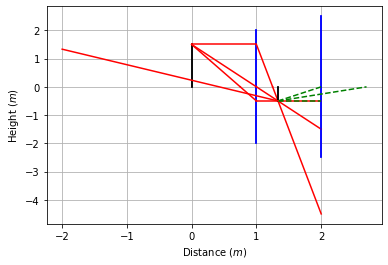

1.0758006999999452 seconds


In [11]:
set2(0,1.5,1,4,2,5,.25,.7)

plt.grid()
plt.xlabel("Distance $(m)$")
plt.ylabel("Height $(m)$")
plt.show()

print(time.perf_counter() - start_time, "seconds")